# Maternal Health Risk Assessment System

# Data Understanding

## Preprocessing

### IMPORT PACKAGES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Data Information

In [2]:
# Loading the dataset
data = pd.read_csv("Maternal Health Risk Data Set.csv")

print('Number of records = %d' % (data.shape[0]))
print('Number of features = %d' % (data.shape[1]))
data.head()

Number of records = 1014
Number of features = 7


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


#### Data Types

In [3]:
# Printing data types of our DataFrame 'data'
data.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

#### Data Statistics

In [4]:
print("Data Statistics:")
data.describe()

Data Statistics:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


### Handling Missing Values and Checking for Duplicates

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Check for duplicates
duplicates = data.duplicated().sum()
print("Number of duplicates:", duplicates)

Missing values:
 Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64
Number of duplicates: 562


In [6]:
# Find duplicated rows
duplicate_rows = data[data.duplicated()]

# Print duplicated rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
67     19         120           80   7.0      98.0         70   mid risk
72     19         120           80   7.0      98.0         70   mid risk
97     19         120           80   7.0      98.0         70   mid risk
106    50         140           90  15.0      98.0         90  high risk
107    25         140          100   6.8      98.0         80  high risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[562 rows x 7 columns]


**Note**

Since our dataset only has 1014 entries, having 562 exact copies is quite a big chunk. If we remove them, we will lose more than half of our data. Before we decide what to do, it is important to figure out why these copies exist and if they are accurate or not. Therefore, for the time being, we will not change anything.  

In [7]:
# Remove the word "risk" from the values in the "RiskLevel" column (just for simplification)
data["RiskLevel"] = data["RiskLevel"].str.replace("risk", "").str.strip()

# confirm the changes
print(data.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate RiskLevel
0   25         130           80  15.0      98.0         86      high
1   35         140           90  13.0      98.0         70      high
2   29          90           70   8.0     100.0         80      high
3   30         140           85   7.0      98.0         70      high
4   35         120           60   6.1      98.0         76       low


**Note**

At this stage we will start with Exploratory Data Analysis (EDA) and then proceed with splitting the data for modeling. We will keep feature scaling, data transformation, and normalization steps within the modeling pipeline, tailored to each algorithm's requirements.

## Exploratory Data Analysis

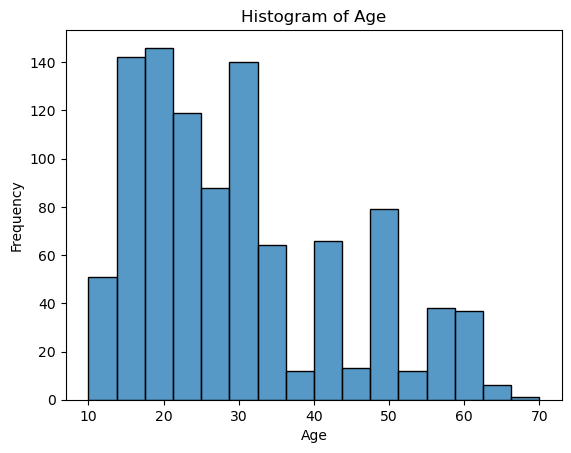

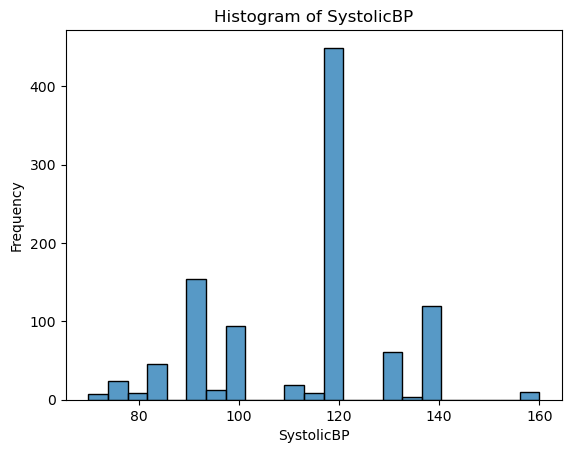

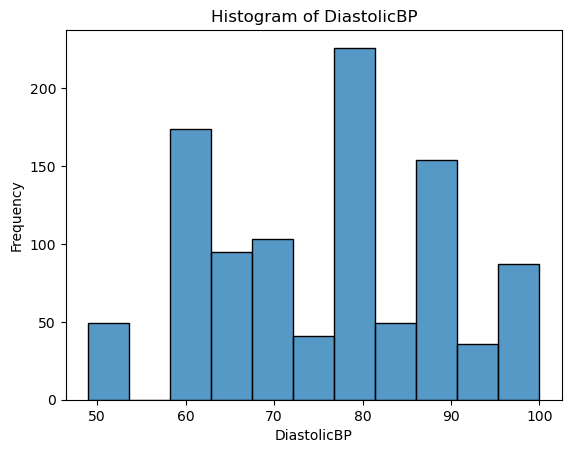

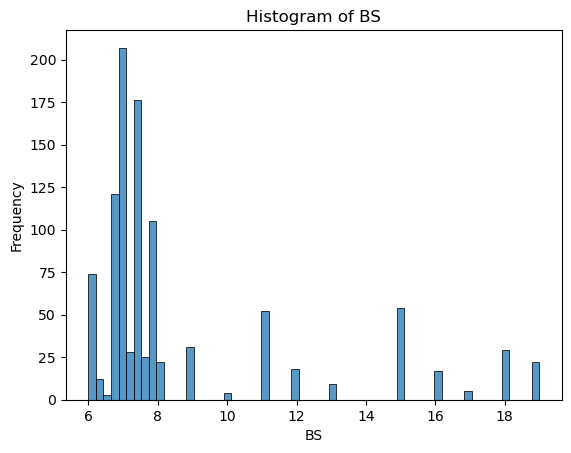

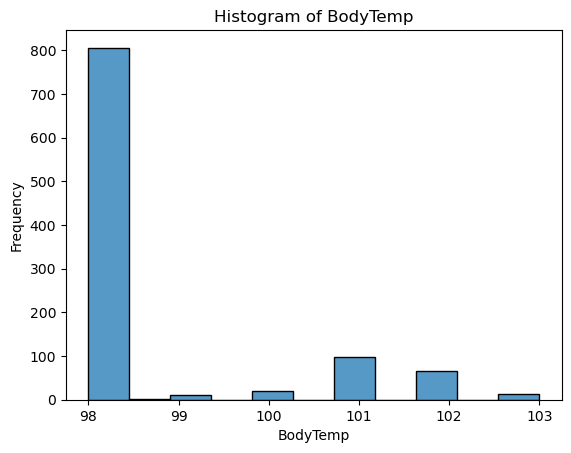

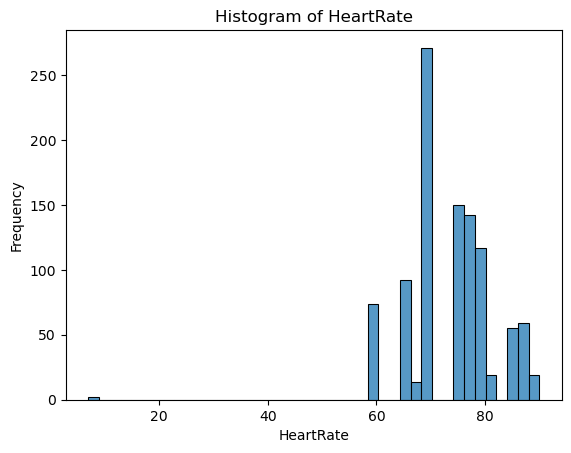

In [8]:
# Histogram to understand the distribution of numerical features
for column in data.select_dtypes(include = "number").columns:
    sns.histplot(data = data, x = column)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show() 

In [9]:
# # Visualizing Numerical Features vs. Target
# for column in data.select_dtypes(include = "number").columns:
#     plt.figure(figsize = (8, 6))
#     sns.scatterplot(data = data, x = column, y = 'RiskLevel')
#     plt.title(f'{column} vs. RiskLevel')
#     plt.xlabel(column)
#     plt.ylabel('RiskLevel')
#     plt.show() 

C:\Users\DELL\AppData\Local\anaconda3\envs\DM_ENV\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


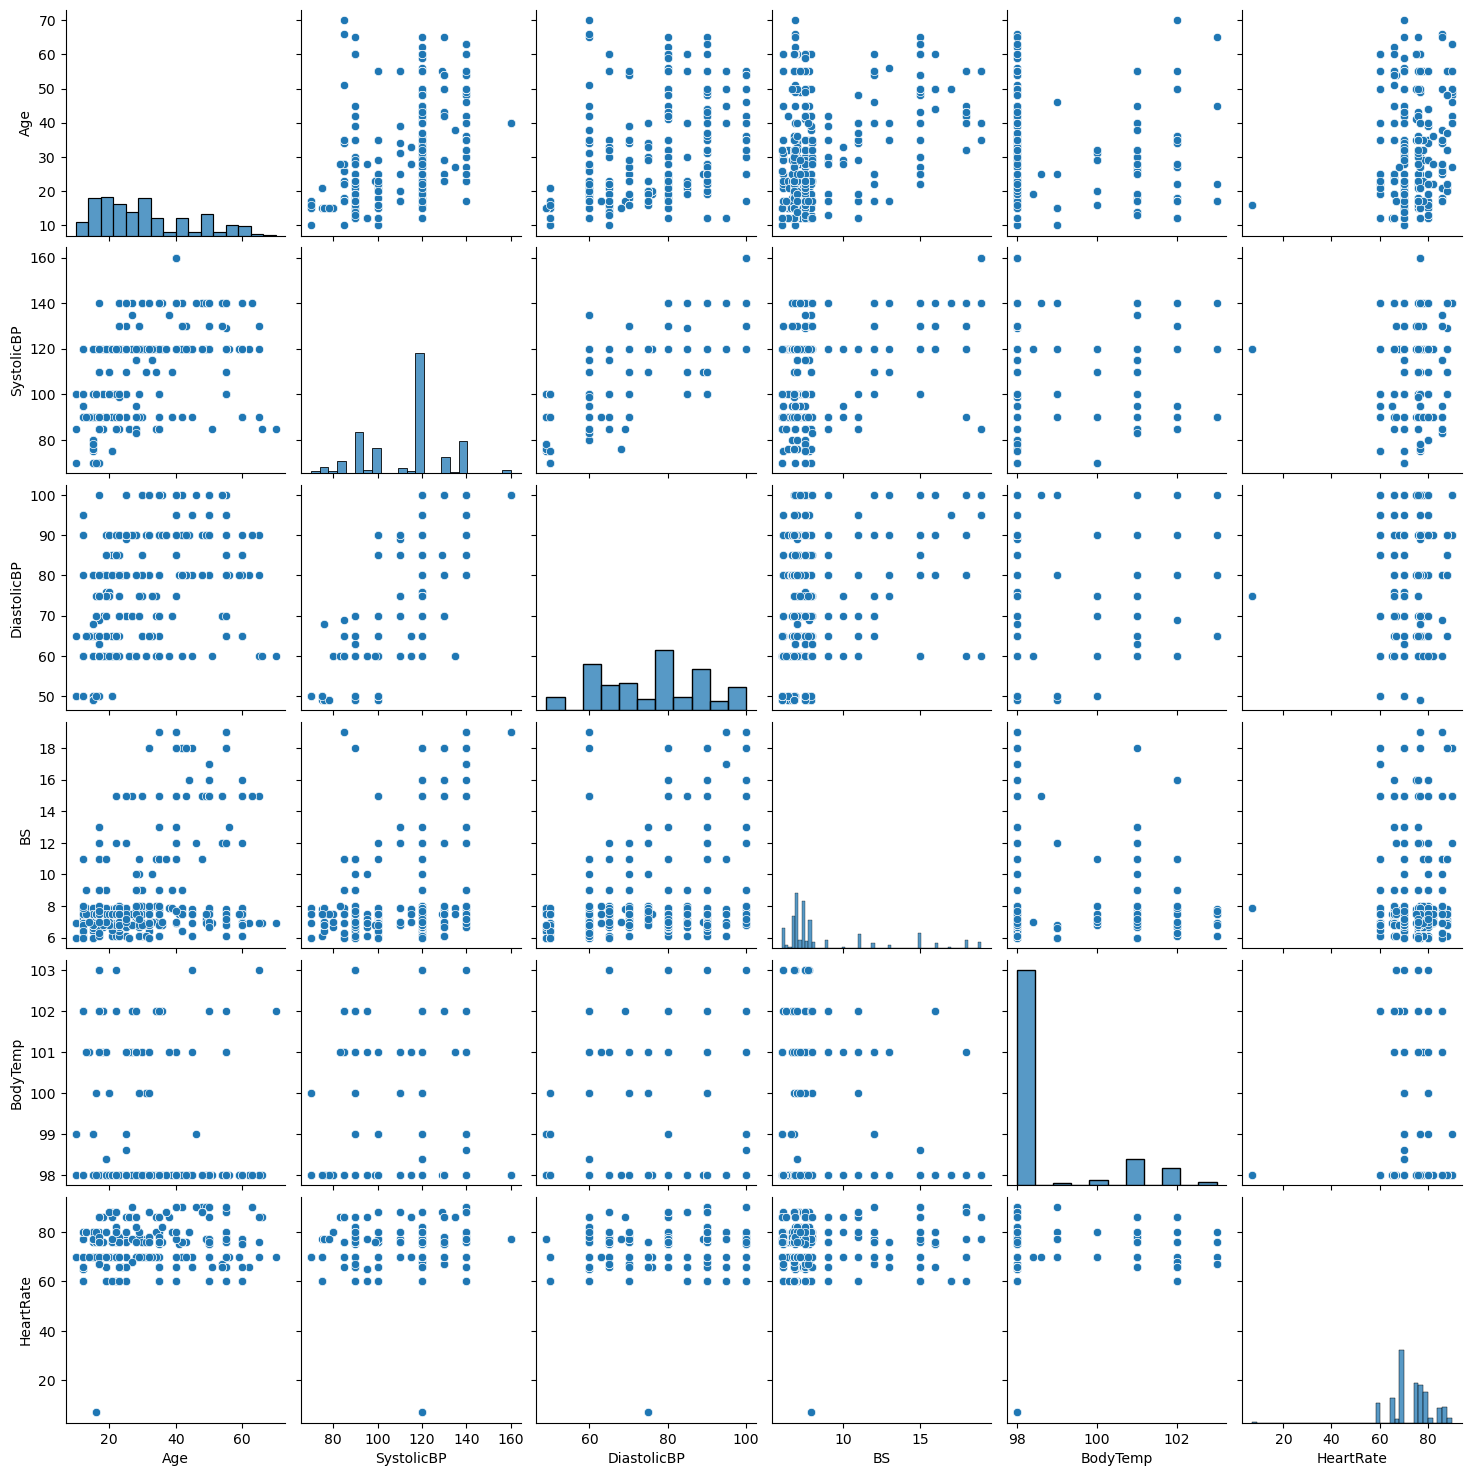

In [10]:
# Pairplot to visualize relationships between numerical features (using scatter plots)
sns.pairplot(data)
plt.show()

**Notes** 

- This pairplot provides a convenient way to visualize the relationships and distributions of numerical features in our dataset. It helps identify potential patterns, trends, or correlations between features, which can be useful for further analysis and modeling.
- This grid of scatter plots represents each numerical feature plotted against every other numerical feature (we have 6 numerical features).
- The scatter plots on the diagonal represent the distribution of each individual numerical feature (histograms for univariate data).
- The scatter plots off the diagonal represent the relationship between pairs of numerical features (bivariate data).

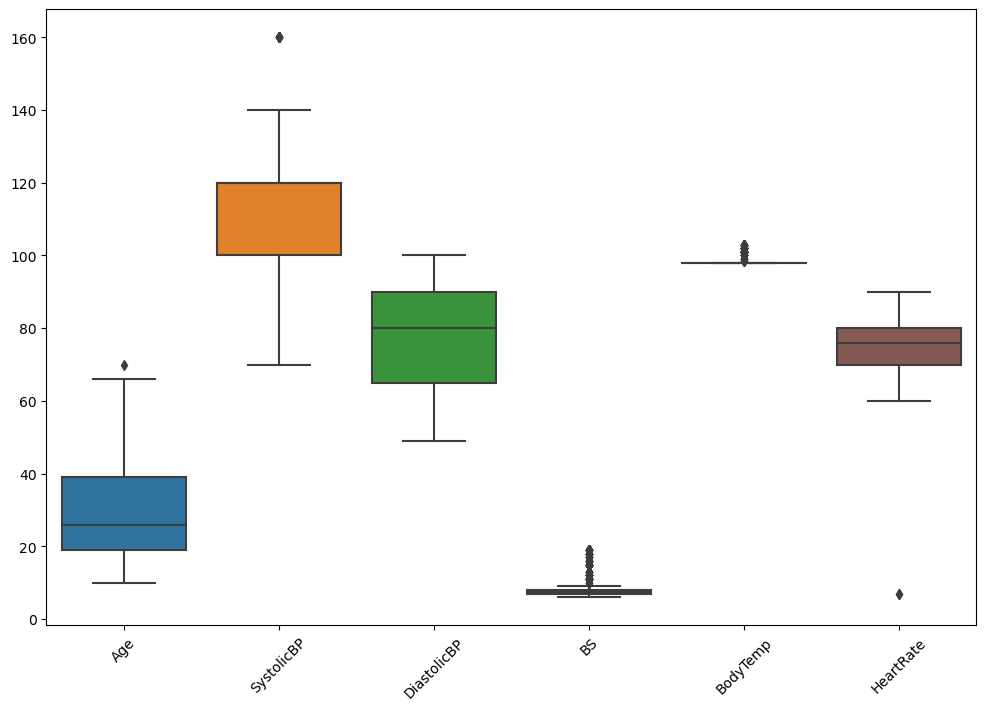

In [11]:
# Box plots to visualize the distribution of numerical features
plt.figure(figsize = (12, 8))
sns.boxplot(data = data)
plt.xticks(rotation = 45)
plt.show()

It should help us in identifying central tendencies, variability, and potential outliers in the data.

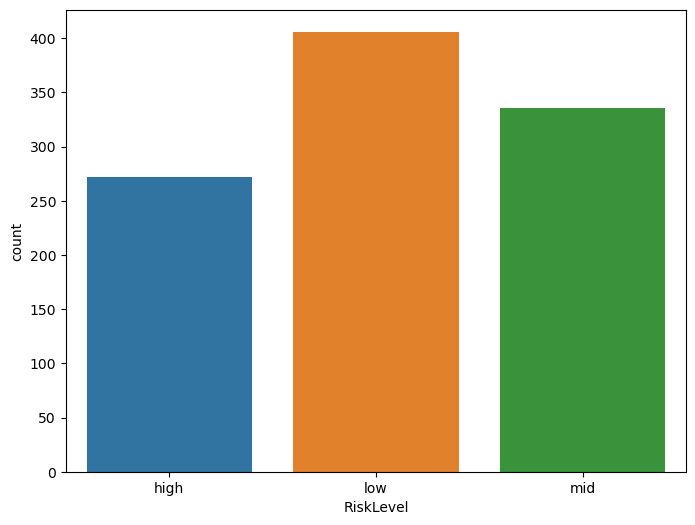

In [12]:
# Bar plot to visualize the distribution of the categorical feature 'RiskLevel'
plt.figure(figsize = (8, 6))
sns.countplot(data = data, x = 'RiskLevel')
plt.show()

# Modeling

## Splitting Data

In [13]:
# Splitting the dataset into features (X) and target variable (y)
X = data.drop(columns = ['RiskLevel'])  # Features
y = data['RiskLevel']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Displaying the shapes of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape) 

Train set shape: (811, 6) (811,)
Test set shape: (203, 6) (203,)
